In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [53]:
input = x = tf.keras.layers.Input(5)
x = tf.keras.layers.Dense(5, use_bias=True)(x)
x = tf.keras.layers.Activation("relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, use_bias=True)(x)
x = tf.keras.layers.Activation("relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, use_bias=True)(x)
model = tf.keras.Model(input,x)
opt=keras.optimizers.SGD(lr=0.0001)

In [60]:
model.compile(opt,loss="mse")

In [83]:
# Data
# y=sum_n( n^2 * x_n)
def f(x):
    SUM = 0
    for itr, n in enumerate(x):
        SUM += n*(itr**4)
    return SUM
X = []
Y = []
for _ in range(10000):
    X.append(np.random.randn(5))
    Y.append(f(X[-1]))
X = np.array(X)
Y = np.array(Y)

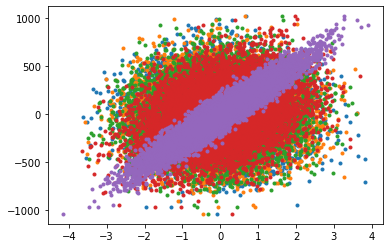

In [84]:
plt.plot(X[:,0].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,1].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,2].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,3].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,4].reshape(-1),Y.reshape(-1),".")

In [85]:
model.fit(X,Y,epochs=100,batch_size=500)

Epoch 1/100
20/20 [==============================] - 0s 866us/step - loss: 73740.2891
Epoch 2/100
20/20 [==============================] - 0s 862us/step - loss: 67832.0703
Epoch 3/100
20/20 [==============================] - 0s 863us/step - loss: 18360.3164
Epoch 4/100
20/20 [==============================] - 0s 858us/step - loss: 11263.1582
Epoch 5/100
20/20 [==============================] - 0s 860us/step - loss: 9711.4131
Epoch 6/100
20/20 [==============================] - 0s 866us/step - loss: 9429.2461
Epoch 7/100
20/20 [==============================] - 0s 862us/step - loss: 8656.7812
Epoch 8/100
20/20 [==============================] - 0s 854us/step - loss: 8438.4902
Epoch 9/100
20/20 [==============================] - 0s 864us/step - loss: 8669.1553
Epoch 10/100
20/20 [==============================] - 0s 860us/step - loss: 8446.1260
Epoch 11/100
20/20 [==============================] - 0s 864us/step - loss: 8337.4854
Epoch 12/100
20/20 [==============================] - 0s 86

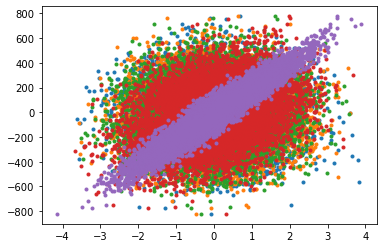

In [86]:
pred=model.predict(X)
plt.plot(X[:,0].reshape(-1),pred[:,0],".")
plt.plot(X[:,1].reshape(-1),pred[:,0],".")
plt.plot(X[:,2].reshape(-1),pred[:,0],".")
plt.plot(X[:,3].reshape(-1),pred[:,0],".")
plt.plot(X[:,4].reshape(-1),pred[:,0],".")
plt.show()

# Gradient Taping and Assign Add

In [91]:
# Model front
input1 = x = tf.keras.layers.Input(5)
# x = tf.keras.layers.Dense(5)(x)
x = tf.keras.layers.Dense(5,use_bias=False)(x)
model_front = tf.keras.Model(input1,x)
# Model End
input2 = tf.keras.layers.Input(5)
# x = tf.keras.layers.Dense(5)(x)
x2 = tf.keras.layers.Dense(1,use_bias=False)(input2)
model_end = tf.keras.Model(input2,x2)

opt2=keras.optimizers.Adam(lr=0.001)

In [92]:
# for ii in range(1000):
#     # using output of model_front
#     XX = model_front(X)
#     # to update model_end
#     with tf.GradientTape() as tape:
#         logits=model_end(XX)
#         loss=tf.reduce_mean(keras.losses.MSE(Y, logits))
#     grads=tape.gradient(loss,model_end.trainable_weights)
#     # Gradient Descent for model end
#     for w, g in zip(model_end.weights, grads):
#         w.assign_add(-g*.01)

# Back propagating between unconnected models

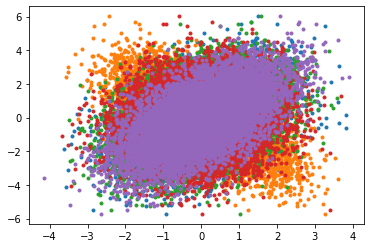

In [93]:
pred=model_end.predict(model_front.predict(X))
plt.plot(X[:,0].reshape(-1),pred.reshape(-1),".")
plt.plot(X[:,1].reshape(-1),pred.reshape(-1),".")
plt.plot(X[:,2].reshape(-1),pred.reshape(-1),".")
plt.plot(X[:,3].reshape(-1),pred.reshape(-1),".")
plt.plot(X[:,4].reshape(-1),pred.reshape(-1),".")
plt.show()

In [94]:
for ii in range(1000):
    # Using output of model_front, the embedding, as variable
    XX = model_front(X)
    XX=tf.Variable(XX)
    # Record gradient of embedding according to loss
    with tf.GradientTape() as tape:
        logits=model_end(XX)
        loss=tf.reduce_mean(keras.losses.MAE(Y, logits))
    grads_XX,*grads=tape.gradient(loss,[XX]+model_end.trainable_weights)
    for w, g in zip(model_end.weights, grads):
        w.assign_add(-g*.0001)
    
    # Back propagate the gradient form embedding to model_front
    with tf.GradientTape() as tape:
        XX=model_front(X)
    grad_front = tape.gradient(XX, model_front.trainable_weights, grads_XX)
    _=opt.apply_gradients(zip(grad_front, model_front.trainable_weights))

In [95]:
pred=model_end.predict(model_front.predict(X))

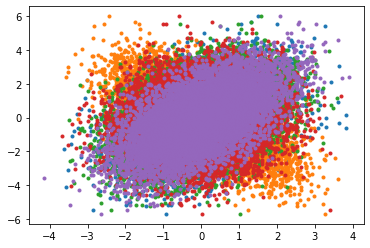

In [96]:
plt.plot(X[:,0].reshape(-1),pred[:,0],".")
plt.plot(X[:,1].reshape(-1),pred[:,0],".") 
plt.plot(X[:,2].reshape(-1),pred[:,0],".")
plt.plot(X[:,3].reshape(-1),pred[:,0],".")
plt.plot(X[:,4].reshape(-1),pred[:,0],".")
plt.show()

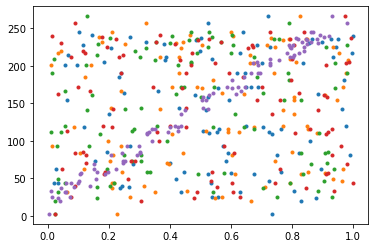

In [84]:
plt.plot(X[:,0].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,1].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,2].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,3].reshape(-1),Y.reshape(-1),".")
plt.plot(X[:,4].reshape(-1),Y.reshape(-1),".")
plt.show()

In [45]:
grads2[3]

IndexError: list index out of range

In [43]:
model_end.trainable_weights

[<tf.Variable 'dense_2/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[ 1.5899707],
        [ 1.613147 ],
        [-1.5413516],
        [ 1.9645859],
        [-1.4346441]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.15743476], dtype=float32)>]